# Phát hiện bệnh lý qua ảnh chụp X-quang vùng ngực.

Bài toán phát hiện bệnh lý trên ảnh chụp X-quang vùng ngực sử dụng deep learning.  
* **Đầu vào:** một ảnh chụp X-quang vùng ngực.
* **Đầu ra:** kết quả bệnh nhân có mắc bệnh hay không.
  
Để thực hiện bài toán trên, cần tìm hiểu các kiến thức liên quan như **bộ dữ liệu Chest X-ray 14** và **các mô hình deep learning**. Các nội dung này sẽ đuược trình bày trong phần sau.  

Bảng so sánh giữa các phương pháp dựa trên AUROC của mỗi bệnh lý.

|     Pathology      | Tên bệnh | [Wang et al.](https://arxiv.org/abs/1705.02315) | [Yao et al.](https://arxiv.org/abs/1710.10501) | [CheXNet](https://arxiv.org/abs/1711.05225) |
| :----------------: | :--------------------------------------: | :--------------------------------------: | :--------------------------------------: | :--------------------------------------: |
|    Atelectasis     |   Chứng xẹp phổi     |                0.716                   |                  0.772                   |                  0.8094                | 
|    Cardiomegaly    |   Chứng tim to       |                0.807                   |                  0.904                   |                  0.9248                  |
|      Effusion      |   Tràn dịch phổi     |                0.784                   |                  0.859                   |                  0.8638                  |
|    Infiltration    |   Thâm nhiễm         |                0.609                   |                  0.695                   |                  0.7345                  |
|        Mass        |   Hạch phổi (lớn)    |                0.706                   |                  0.792                   |                  0.8676                  |
|       Nodule       |   Hạch phổi (nhỏ)    |                0.671                   |                  0.717                   |                  0.7802                  |
|     Pneumonia      |   Viêm phổi          |                0.633                   |                  0.713                   |                  0.7680                  |
|    Pneumothorax    |   Tràn khí màng phổi |                0.806                   |                  0.841                   |                  0.8887                  |
|   Consolidation    |   Phổi đông đặc      |                0.708                   |                  0.788                   |                  0.7901                  |
|       Edema        |   Phù phổi           |                0.835                   |                  0.882                   |                  0.8878                  |
|     Emphysema      |   Khí thủng          |                0.815                   |                  0.829                   |                  0.9371                  |
|      Fibrosis      |   Xơ phổi            |                0.769                   |                  0.767                   |                  0.8047                  |
| Pleural Thickening |   Dày màng phổi      |                0.708                   |                  0.765                   |                  0.8062                  |
|       Hernia       |   Thoát vị           |                0.767                   |                  0.914                   |                  0.9164                  |



### 1. Dataset Chest X-ray 14

#### 1.1 Giới thiệu

Dataset Chest X-ray 14 là dataset về ảnh chụp X-quang vùng ngực, đuược giới thiệu trong bài báo [ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases](http://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf).  
Ban đầu, dataset được gán nhãn với 8 loại bệnh lý vùng ngực khác nhau. Sau, dataset được tác giả mở rộng thêm 6 loại bệnh lý khác, thành tổng cộng có 14 loại bệnh lý vùng ngực được được gán nhãn trong dataset.   
Dataset gồm 112,120 ảnh với 30,805 bệnh nhân.  
Mỗi ảnh chụp X-quang có thể được gán một hoặc nhiều nhãn, tương ứng với một hoặc nhiều bệnh lý. Trường hợp không có bệnh lý ảnh được gán nhãn “No Finding”.  
Nhãn của ảnh được gán bằng cách sử dụng xử lý ngôn ngữ tự nhiên (NLP), khai thác thông tin từ  báo cáo đính kèm với mỗi ảnh X-quang.

#### 1.2 Xây dựng dataset

Ảnh X-quang là một trong những phương pháp phổ biến nhất trong việc xem xét và chuẩn đooán các bệnh về phổi. Do đó, một số lượng lớn ảnh X-quang được tích lũy và lưu trữ trong *Picture Archiving and Communication Systems* (PACS).
Vấn đề đặt ra là làm sao để những dữ liệu về ảnh X-quang trên có thể được sử dụng trong các mô hình deep learning trong việc xây dựng hệ thống *computer-aided diagnosis* (CAD).  
Để giải quyết câu hỏi trên, nhóm tác giả xây dựng dataset Chest X-ray 8, với nhãn của ảnh được khai thác từ các báo cáo đính kèm, bằng cách sử dụng xử lý ngôn ngữ tự nhiên (NLP).  
Đầu tiên, liệt kê ra danh sách 8 keywords về các bệnh ở phổi thuờng được xem xét và chuẩn đoán (Ateletasis, Cardiomegaly, Effusion, Infiltration, Mass, Nodule, Pneumonia, Pneumothroax).   
Tìm kiếm trên hệ thống PACS để tìm ra các báo cáo có liên quan cùng với ảnh. Sau đó dụng NLP để phát hiện ra các keywords và gán nhãn.

**2.1 Gán nhãn bằng Text Mining**  
Đầu tiên, liệt kê ra danh sách 8 keywords về các bệnh ở phổi thuờng được xem xét và chuẩn đoán (Ateletasis, Cardiomegaly, Effusion, Infiltration, Mass, Nodule, Pneumonia, Pneumothroax).   
Tìm kiếm trên hệ thống PACS để tìm ra các báo cáo có liên quan cùng với ảnh. Sau đó dụng NLP để phát hiện ra các keywords và gán nhãn.

**Gán nhãn bệnh bằng kỹ thuật Text Mining**  
Phát hiện các bệnh có trong nội dung báo cáo.  
Phần thân của báo cáo thường có cấu trúc chung gồm các phần: "Comparison", "Indication", "Findings", "Impression". Ở đây cần tập trung vào phần "Findings" và phần "Impression" để khai thác. Tuy nhiên, nếu báo cáo không có hai phần này thì toàn bộ báo cáo sẽ được sử dụng để khai thác thông tin.
Nếu không tìm thấy bất cứ nội dung về bệnh trong báo cáo (không chỉ giới hạn trong trong 8 bệnh) thì báo cáo được đánh dấu là "Normal".  

Hai công cụ được sử dụng để khai thác thông tin trong báo cáo là DNorm và MetaMap. Đây là công cụ để phát hiện các thuật ngữ y khoa trong các văn bản và chuyển các từ phát hiện được thành các ID tương ứng với các thuật ngữ đó.

**Negation and Uncertainty**  
Việc phát hiện các keywords về bệnh trong báo cáo không đồng nghĩa với việc có sự xuất hiện của bệnh đó trên ảnh.  
*Ví dụ:* "suggesting obstructive lung disease". Trong câu trên, các kỹ thuật có thể phát hiện ra từ "lung disease"; tuy nhiên, thực tế câu trên chỉ là **sự nghi ngờ, không chắc chắn** là có bệnh, chứ không phải là một câu **khẳng định** có bệnh.  
Vì thế việc loại bỏ những trường hợp negation/uncertainty gây nhiễu như trên là cần thiết.

Mặc dù có rất nhiều kỹ thuật NLP được sử dụng để xử lý vấn đề trên, hầu hết chúng đều sử dụng biếu thức chính quy (regular expressions). Một trong những khuyết điểm của việc sử dụng biểu thức chính quy để phát hiện negetion/uncertainty là chúng không thể nắm bắt được các cấu trúc câu cho nhiều đối tượng.    
*Ví dụ:* "clear of A and B". Đối với con người, dễ dàng thấy câu này có nghĩa là "không có cả A lẫn B"; tuy nhiên, các biểu thức chính quy chỉ có thể hiểu là "không có A" và "có B".  
Để giải quyết vấn đề trên, nhóm tác giả đã đặt ra một số luật để phát negation/uncertainty bằng cách sử dụng thông tin syntactic depenpency vì chúng khá giống với semantic relationship giữa các từ. Các luật được định nghĩa trên dependency graph, sử dụng dependency label và direction information để thể hiện quan hệ giữa các từ trong câu.
*Ví dụ: "clear of focal airspace disease, pneumothorax, or pleural effusion"*  
Ta có thể sử dụng luật "clear -> prep_of -> DISEASE" để phát hiện ba negation trong câu trên <neg, focal airspace disease>, <neg, pneumothorax> và <neg, pleural effusion>.  
Trong dependency graph bên dưới, có các dependency label nối giữa các từ (prep_of, conj_or) và direcion information (là hướng các mũi tên giữa các từ và các dependency label).

![alt](dependency-graph.jpg)

Một số luật để giải quyết vấn đề negation/uncertainty và các ví dụ tương ứng.

![alt](negation-uncertainty-rules.jpg)

**Đánh giá**  
Để đánh giá phương pháp gán nhãn (như trình bày ở trên) một các khách quan, tác giả sử dụng một tập các báo cáo khác được gán nhãn bởi con người. Cụ thể, 3,851 báo cáo ảnh X-quang được lấy từ [OpenI](https://openi.nlm.nih.gov/), mỗi báo cáo đợc gán nhãn bởi con người. Sau đó, chỉ tập trung vào 8 bệnh cần phát hiện, một tập con các báo cáo được chọn ra và được sử dụng như tiêu chuẩn để đánh giá phương pháp gán nhãn.  
Bảng sau tóm tắt các phân tích của tập con trong OpenI và Chest X-ray 8.
*đưa cái bảng dô*

So sánh phương pháp gán nhãn trong bài báo với MetaMap (có sử dụng NegEx).
* Precision, Recall, F1-score trung bình cao hơn so với MetaMap.
* Đối với hai bệnh *Pneumothorax* và *Infiltration* precision cao hơn hẳn so với sử dụng MetaMap. Điều này cho thấy việc phát hiện negation/uncertainty đã thành công trong việc loại bỏ các trường hợp false positive case.

**Bounding box**  
Một số lượng nhỏ ảnh X-quang trong dataset sẽ được gán bounding boxes, được sử dụng như groud-truth trong các bài toán localization.  
Đầu tiên mỗi bệnh chọn ra 200 trường hợp (tổng cộng 1,600 trường hợp), bao gồm 983 ảnh.  
Cho trước một ảnh và tên bệnh, các chuyên gia sẽ xác định bệnh tương ứng trong ảnh và gán bounding box cho bệnh đó. Một ảnh có thể có nhiều bounding boxes.

 #### 1.3 Một số thống kê và nhận xét

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')

In [2]:
%matplotlib inline

**Các thông tin của một ảnh:**
* Image Index: Tên ảnh
* Finding Labels: Nhãn một hoặc nhiều bệnh trong ảnh (Cardiomegaly, Emphysema, Effusion, Hernia, Nodule, Pneumothorax, Atelectasis, Pleural Thickening, Mass, Edema, Consolidation, Infiltration, Fibrosis, Pneumonia). Nếu ảnh không chứa bệnh thì nhãn là "No Finding".
* Follow up #: ảnh thứ n của bệnh nhân. Ví dụ Follow up number = 17 thì đó là ảnh thứ 17 của bệnh nhân trong dataset.
* Patient ID: mã bệnh nhân.
* Patient Age: tuổi của bệnh nhân.
* Patient Gender: giới tính của bệnh nhân.
* View position: vị trí chụp ảnh. (AP: anteriorposterior – bệnh nhân đứng đối diện với máy chụp X-quang; PA: posterioranterior – bệnh nhân đứng quay lưng về phía máy chụp X-quang: chiếm 60%)
* Width/ Height: kích thước ảnh.

In [3]:
df = pd.read_csv('Data_Entry_2017.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


**Một số thông kê đơn giản.**
* Số lượng ảnh trong dataset: 112,120
* Số bệnh nhân: 30805
* Độ tuổi trung bình bệnh nhân: 46.9. Tuy nhiên, độ tuổi lớn nhất là 414??? Cho thấy một vài lỗi về độ tuổi trong dataset.


In [4]:
df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [27]:
df = df[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]

#create new columns for each decease
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia', 'No Finding']

for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

Sắp xếp theo tuổi bệnh nhân và liệt kê top 20 để xem xét.
Có 16 bệnh nhân trên 100 tuổi???

In [12]:
df[['Image Index', 'Patient ID', 'Patient Age']].sort_values('Patient Age', ascending=False).head(20)

,Image Index,Patient ID,Patient Age
46965,00011973_002.png,11973,414
86264,00021275_003.png,21275,413
91369,00022811_000.png,22811,412
85404,00021047_002.png,21047,412
20852,00005567_000.png,5567,412
84810,00020900_002.png,20900,411
101194,00026871_000.png,26871,155
104590,00027989_000.png,27989,155
98495,00026028_001.png,26028,154
95794,00025206_000.png,25206,153


Liệt kê thông tin các ảnh của một bệnh nhân tuổi bị sai, thấy rằng **Follow-up #** không được gnas theo trình tự thời gian.

In [24]:
df.loc[df['Patient ID']==5567,['Patient Age','Finding Labels','Follow-up #']].sort_values('Patient Age',ascending=False)

,Patient Age,Finding Labels,Follow-up #
20852,412,Effusion|Pneumonia,0
20861,57,No Finding,9
20859,57,Fibrosis,7
20860,57,Fibrosis,8
20856,54,Atelectasis,4
20857,54,Atelectasis,5
20858,54,No Finding,6
20876,53,Atelectasis|Consolidation,24
20853,53,Effusion,1
20877,53,Pneumonia,25


**Phân bố bệnh lý theo giới tính**

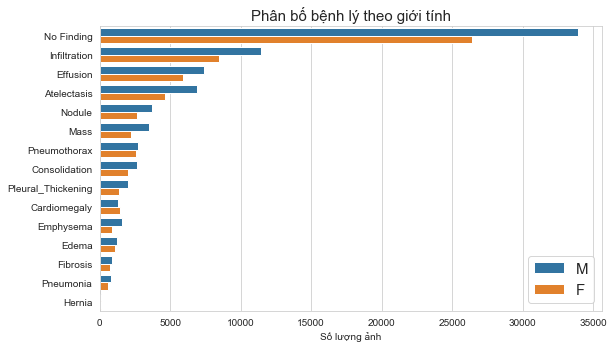

In [31]:
plt.figure(figsize=(9,6))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
data1 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="Số lượng ảnh")
ax1.legend(fontsize=15)
ax1.set_title('Phân bố bệnh lý theo giới tính',fontsize=15);


**Phân bố bệnh lý**  
Phân bố bệnh lý trong dataset cho thấy đây là một **imbalanced dataset**. 
* Số lượng ảnh không chứa bệnh **"No finding" chiếm hơn 1/2** so với số ảnh chứa bệnh.  
* Mặc khác, các ảnh có bệnh cũng phân bố không đồng đều. Ví dụ như chỉ có **227** trường hợp mắc bệnh heria trong khi có đến **19894** trường hợp mắc bệnh infiltration.

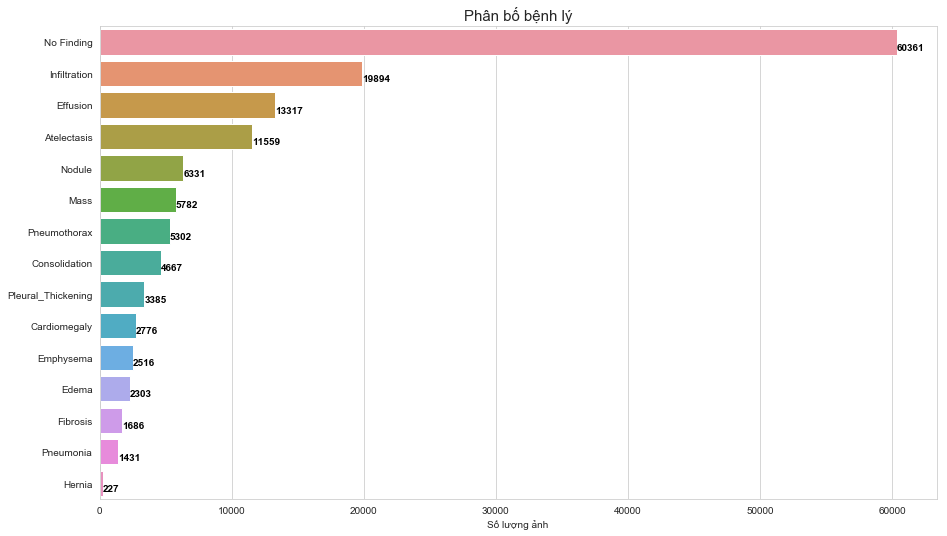

In [32]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax2 = plt.subplot(gs[:7, :])
data1_count = data1['Category'].value_counts()
g=sns.countplot(y='Category',data=data1,ax=ax2, order = data1['Category'].value_counts().index)
ax2.set( ylabel="",xlabel="Số lượng ảnh")
ax2.set_title('Phân bố bệnh lý',fontsize=15);
for i, v in enumerate(data1_count):
    ax2.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
plt.subplots_adjust(hspace=.5)

In [35]:
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=data[['|' in index for index in data.index]].copy()
df2=data[['|' not in index for index in data.index]]
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
df1['Finding Labels']=df1.index.values

Một ảnh có thể có một hoặc nhiều bệnh.

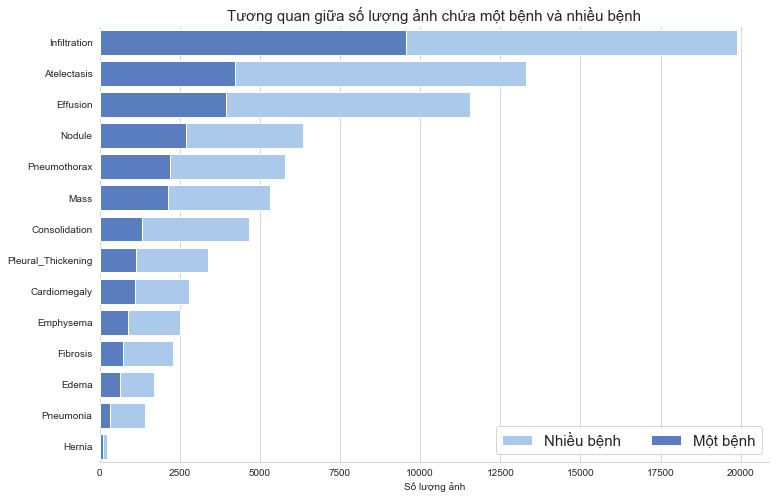

In [40]:
f, ax = plt.subplots(sharex=True,figsize=(12, 8))
sns.set_color_codes("pastel")
g=sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index[1:],color='b',label="Nhiều bệnh")
sns.set_color_codes("muted")
g=sns.barplot(x='Patient ID',y='Finding Labels',data=df2, ax=ax, color="b",label="Một bệnh")
ax.legend(ncol=2, loc="lower right", frameon=True,fontsize=15)
ax.set( ylabel="",xlabel="Số lượng ảnh")
ax.set_title("Tương quan giữa số lượng ảnh chứa một bệnh và nhiều bệnh",fontsize=15)      
sns.despine(left=True)

Bên dưới là biểu đồ tròn thể hiện sự tương quan giữa các bệnh trong dataset.  
Một số cặp bệnh thường xuyên xuất hiện cùng nhau:
* Infiltration - Effusion
* Infiltration - Atelectasis
* Infiltraiton - Nodule
* Infiltration - Consolidation
* Effusion - Atelectasis
* Effusion - Mass
* Atelectasis - Consolidation

![alt](pie-chart.jpg)